[-5.75270348  7.04842524 31.42472822  1.88136422  6.24080944 -6.65151691]
    Actual ON/OFF  Predicted ON/OFF
0            22.5        -22.266593
1            33.8        112.055586
2            48.3         53.090033
3           381.0        273.343402
4             3.2        -15.177834
5            48.6         16.800032
6             2.6         -4.591702
7             7.3         10.600849
8             1.0         -0.210305
9            12.2         22.654347
10          169.9        256.710607
11            1.3        -38.452363
12            1.9        -10.999294
13           39.1         17.917376
14            7.4          2.647271


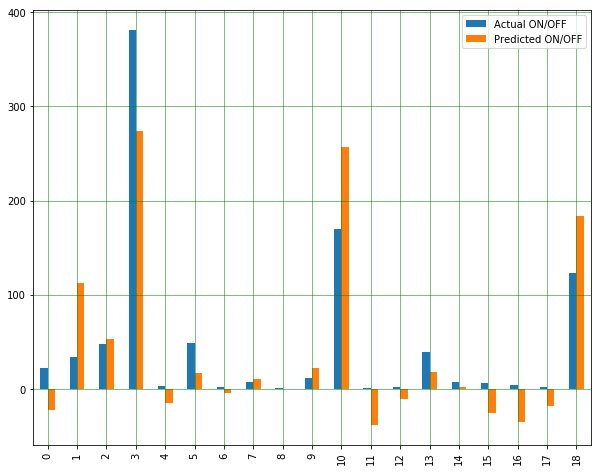

Mean Absolute Error: 32.88171952410592
Mean Squared Error: 1981.9988751658038
Root Mean Squared Error: 44.519645946096695
R-squared Value:  0.7541683408659163


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     79.54
Date:                Sun, 19 May 2019   Prob (F-statistic):           2.89e-47
Time:                        15:06:48   Log-Likelihood:                -1001.1
No. Observations:                 181   AIC:                             2016.
Df Residuals:                     174   BIC:                             2039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4847     60.822      1.274      0.204     -42.559     197.529
x1            -4.9351      4.364     -1.131      0.260     -13.548       3.678
x2             7.5309      4.432      1.699      0.091      -1.216      16.277
x3            31.8194      2.923     10.885      0.000      26.050      37.589
x4             1.3424      1.253      1.071      0.285      -1.131       3.815
x5             6.4221      2.311      2.779      0.006       1.860      10.984
x6            -3.3293      9.998     -0.333      0.740     -23.061      16.403
==============================================================================
Omnibus:                       89.133   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.332
Skew:                           1.811   Prob(JB):                    2.72e-103
Kurtosis:                      10.036   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

dataset = pd.read_csv("toehold_data.csv")

X = dataset[['GC_stem_top', 'GC_stem_bottom','preRBS_length','toehold_length','MFE','AU_rich_RBS']].values
y = dataset['on_off_ed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)


print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual ON/OFF': y_test, 'Predicted ON/OFF': y_pred})
first15 = df.head(15)
print(first15)




df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared Value: ",metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

